In [1]:
import pandas as pd
import matplotlib.plyplot as plt

ModuleNotFoundError: No module named 'matplotlib.plyplot'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data_dict = {
    'Sales': [10,20,30,40],
    'Profits':[2,4,3,1],
    'Date': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01']
    
}

df = pd.DataFrame (
    data_dict,
    columns = ['Sales', 'Profits'],
    index = data_dict ["Date"]
)
df

,Sales,Profits
2022-01-01,10,2
2022-02-01,20,4
2022-03-01,30,3
2022-04-01,40,1


Text(0.5, 1.0, 'Product Sales and Profits')

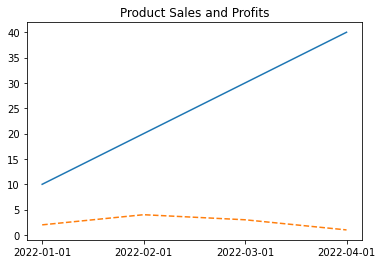

In [12]:
fig, ax = plt.subplots ()

ax.plot (df.index, df["Sales"] )
ax.plot (df.index, df["Profits"], ls = '--')
ax.set_title ('Product Sales and Profits')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
coffee_production = pd.read_csv ('/Users/martarachwani/Documents/coffee/total-production.csv').T
coffee_production.columns = coffee_production.iloc [0]
coffee_production.drop ('total_production', inplace=True)

In [22]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [23]:
axes_settings = {
    'spines.top':False,
    'spines.right':False
}
plt.rc ('axes', **axes_settings)

In [24]:
brazil_vs_others = (coffee_production.assign(rest_of_world = coffee_production
                                             .drop ('Brazil', axis=1).sum(axis=1))
                    .loc[:,['Brazil', 'rest_of_world']]
                    .astype ({'Brazil': 'float64'})
                   )

brazil_vs_others.head()
                            

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [27]:
coffee_production ['Rest of World'] = coffee_production.drop (['Brazil',
                                                               'Viet Nam',
                                                               'Colombia',
                                                               'Indonesia',
                                                               'Ethiopia'
                                                               ], axis=1).sum(axis=1)
coffee_production_top5_2018 = coffee_production.loc ['2018', ['Brazil',
                                                               'Viet Nam',
                                                               'Colombia',
                                                               'Indonesia',
                                                               'Ethiopia',
                                                               'Rest of World'
                                                        
                                                               ]]

pd.DataFrame (coffee_production_top5_2018)

,2018
total_production,
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234
Rest of World,91572.0006


TypeError: Invalid datetime metadata string " [ns]" at position 1

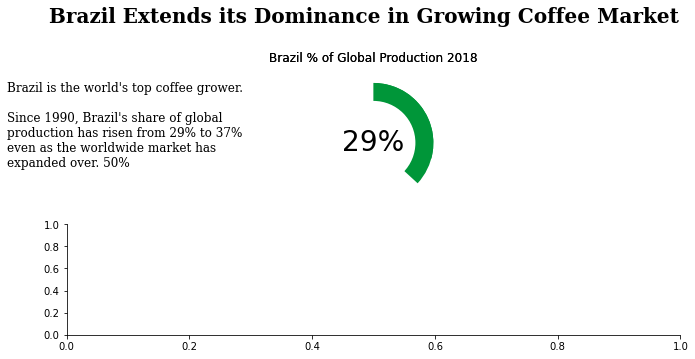

In [39]:
import matplotlib.gridspec as gridspec

fig=plt.figure (figsize = (11, 8.5))

gs = gridspec.GridSpec (nrows=12, ncols=6)

fig.suptitle ('Brazil Extends its Dominance in Growing Coffee Market', 
              fontsize=20,
              fontweight='bold',
              fontfamily='serif')
              
fig.text(.05, .695,
'''
Brazil is the world's top coffee grower.

Since 1990, Brazil's share of global
production has risen from 29% to 37%
even as the worldwide market has
expanded over. 50%
'''
          
          
, fontsize=12, fontweight='light', fontfamily='serif')

ax1 = fig.add_subplot (gs [0:4, 2:4])
ax1.pie (
    brazil_vs_others.iloc [0].sort_values (ascending=False),
    startangle=90,
    labels=["", ""],
    pctdistance=.85,
    colors=["White", "#009639"])
    
center_circle= plt.Circle ((0,0), 0.70, fc='white')
    
fig=plt.gcf()
    
fig.gca().add_artist(center_circle)
    
plt.text (
    0,
    0,
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc ['1990'].sum()*100))}%",
    ha='center',
    va='center',
    fontsize=28
)

ax1.set_title ("Brazil % of Global Production 2018", fontsize=12)
    
ax2 = fig.add_subplot (gs [0:4, 2:4])
    
ax2.pie (
    brazil_vs_others.iloc [-1].sort_values (ascending=False),
    startangle=90,
    labels=["", ""],
    pctdistance=.85,
    colors=["White", "#009639"])
    
center_circle= plt.Circle ((0,0), 0.70, fc='white')
    
fig=plt.gcf()
    
fig.gca().add_artist(center_circle)
    
plt.text (
    0,
    0,
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc ['1990'].sum()*100))}%",
    ha='center',
    va='center',
    fontsize=28
)

ax2.set_title ("Brazil % of Global Production 2018", fontsize=12)

    
ax3 = fig.add_subplot (gs [4:7, :])
    
ax3.stackplot (
    brazil_vs_others.index.astype ("datetime64 [ns]"),
    brazil_vs_others["Brazil"],
    brazil_vs_others["rest_of_world"],
    labels=["Brazil", "World Total"],
    colors=["#009639", "grey"])
    
ax3.set_title("Brazil's Share of Market Grows as Global Output Surges")
ax3.set_ylabel ("Production (K 60kg Bags)", fontsize=12)

ax3.legend (loc="upper left")
    

ax4 = fig.add_subplot (gs [8:, 0:2])
    
ax2.barh ( y=coffee_production_top5_2018.index [::-1],
        width=coffee_production_top5_2018.iloc [::-1],
        color=["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639"])
    
positions= list(range(6))
labels = ["BR", "VN", "CO", "ID", "ET", "Rest of World"][::-1]

ax4.set_title ("Top Coffee Producing Nations 1990-2018")
ax4.set_xlabel ("Production (Millions 60kg Bags)", fontsize=10)
ax4.set_yticklabels (labels)
    

ax5 = fig.add_subplot (gs [8:, 2:])
ax5.pie (coffee_production_top5_2018 [::-1],
    autopct="%.0f%%",
    labels=list (coffee_production_top5_2018.index [::-1],
    startangle=90,
    colors=["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E","#009639", "#C8102E", ],
    explode= (0,0,0,0,0,.15)))
         
ax5.set_title ("Share of Global Coffee Production 2018")

fig.savefig('brazil_stats.png', bbox_inches='tight', facecolor="white")

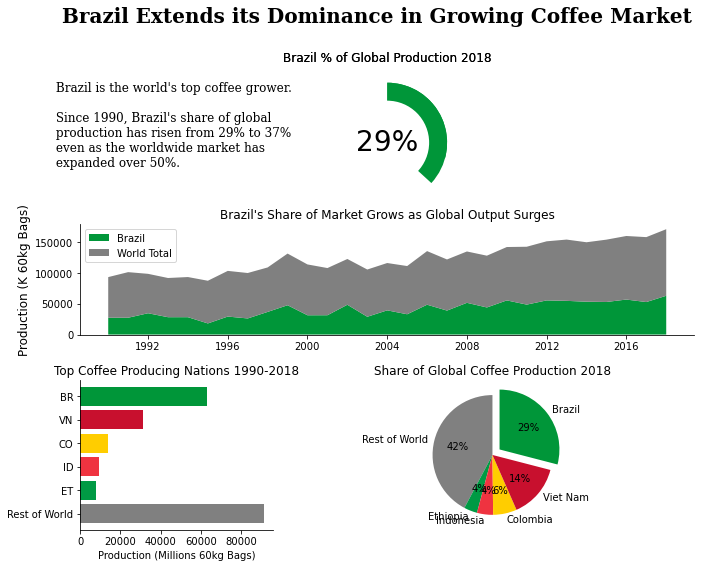

In [41]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(11, 8.5))

gs = gridspec.GridSpec(nrows=12, ncols=6)

fig.suptitle('Brazil Extends its Dominance in Growing Coffee Market',
             fontsize=20,
             fontweight='bold',
             fontfamily='serif')

fig.text(.05, .695,
         '''
         Brazil is the world's top coffee grower.

         Since 1990, Brazil's share of global
         production has risen from 29% to 37%
         even as the worldwide market has
         expanded over 50%.
         ''',
         fontsize=12, fontweight='light', fontfamily='serif')

ax1 = fig.add_subplot(gs[0:4, 2:4])
ax1.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels=["", ""],
    pctdistance=.85,
    colors=["White", "#009639"])

center_circle = plt.Circle((0, 0), 0.70, fc='white')

fig.gca().add_artist(center_circle)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum() * 100))}%",
    ha='center',
    va='center',
    fontsize=28
)

ax1.set_title("Brazil % of Global Production 2018", fontsize=12)

ax2 = fig.add_subplot(gs[0:4, 2:4])

ax2.pie(
    brazil_vs_others.iloc[-1].sort_values(ascending=False),
    startangle=90,
    labels=["", ""],
    pctdistance=.85,
    colors=["White", "#009639"])

center_circle = plt.Circle((0, 0), 0.70, fc='white')

fig.gca().add_artist(center_circle)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum() * 100))}%",
    ha='center',
    va='center',
    fontsize=28
)

ax2.set_title("Brazil % of Global Production 2018", fontsize=12)


ax3 = fig.add_subplot(gs[4:7, :])

ax3.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"),
    brazil_vs_others["Brazil"],
    brazil_vs_others["rest_of_world"],
    labels=["Brazil", "World Total"],
    colors=["#009639", "grey"])

ax3.set_title("Brazil's Share of Market Grows as Global Output Surges")
ax3.set_ylabel("Production (K 60kg Bags)", fontsize=12)

ax3.legend(loc="upper left")


ax4 = fig.add_subplot(gs[8:, 0:2])

ax4.barh(y=coffee_production_top5_2018.index[::-1],
         width=coffee_production_top5_2018.iloc[::-1],
         color=["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639"])

positions = list(range(6))
labels = ["BR", "VN", "CO", "ID", "ET", "Rest of World"][::-1]

ax4.set_title("Top Coffee Producing Nations 1990-2018")
ax4.set_xlabel("Production (Millions 60kg Bags)", fontsize=10)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)


ax5 = fig.add_subplot(gs[8:, 2:])
ax5.pie(coffee_production_top5_2018[::-1],
        autopct="%.0f%%",
        labels=list(coffee_production_top5_2018.index[::-1]),
        startangle=90,
        colors=["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639", "#C8102E"],
        explode=(0, 0, 0, 0, 0, .15))

ax5.set_title("Share of Global Coffee Production 2018")

fig.savefig('brazil_stats.png', bbox_inches='tight', facecolor="white")


In [43]:
#subplots
prices_paid_to_growers = pd.read_csv('/Users/martarachwani/Documents/coffee/prices-paid-to-growers.csv').T.drop(9, axis=1)

prices_paid_to_growers.head()

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

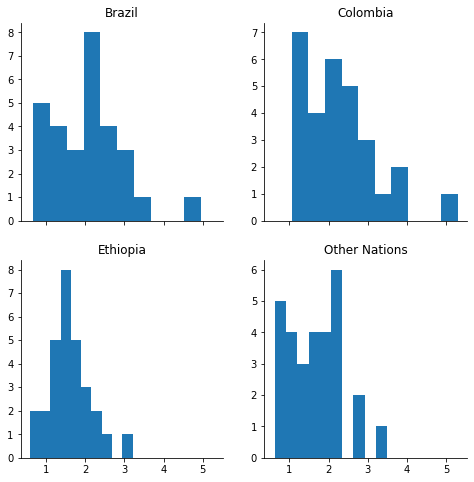

In [44]:
fig, ax = plt.subplots(2, 2, sharex='all', figsize=(8, 8))


ax[0][0].set_title("Brazil")
ax[0][0].hist(prices_paid_to_growers["Brazil"])

ax[0][1].set_title("Colombia")
ax[0][1].hist(prices_paid_to_growers["Colombia"])

ax[1][0].set_title("Ethiopia")
ax[1][0].hist(prices_paid_to_growers["Ethiopia"])

ax[1][1].set_title("Other Nations")
ax[1][1].hist(prices_paid_to_growers["Other Nations"])

plt.show()